### Business Understanding

Breast cancer is one of the most killing cancers for women worldwide. It is important that we could detect it earlier and diagnose it accurately. The aim of this article is to see whether the malignancy of breast cancer can be well detected by the features of the patient’s cell nucleus.
The questions that will be answered here:
1. Are the cell nucleus features are different in the situation of benign and malignant breast cancer?
2. How well can we predict the malignancy using the LogisticRegression and the RandomForest algorithms?
3. What features are the most important to determine the diagnosis result?

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
sns.set(rc={"figure.figsize": (15, 7)})
sns.set_style("whitegrid", {"axes.grid": False})
sns.set_context("notebook")  # "talk", "notebook"

In [3]:
cancer_df = pd.read_csv("breast_cancer.csv", sep=",")

### Data Understanding

In [4]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer_df.groupby('diagnosis').id.count()

diagnosis
B    357
M    212
Name: id, dtype: int64

In [7]:
final_df = cancer_df.iloc[:,1:12]
features_df = final_df.drop('diagnosis', axis=1)

In [40]:
final_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


From the overview of the data above, we can see that the data is already very clean and therefore there is no need to do the further preprocessing. 

### Question 1: Are the cell nucleus features are different in the situation of benign and malignant breast cancer?

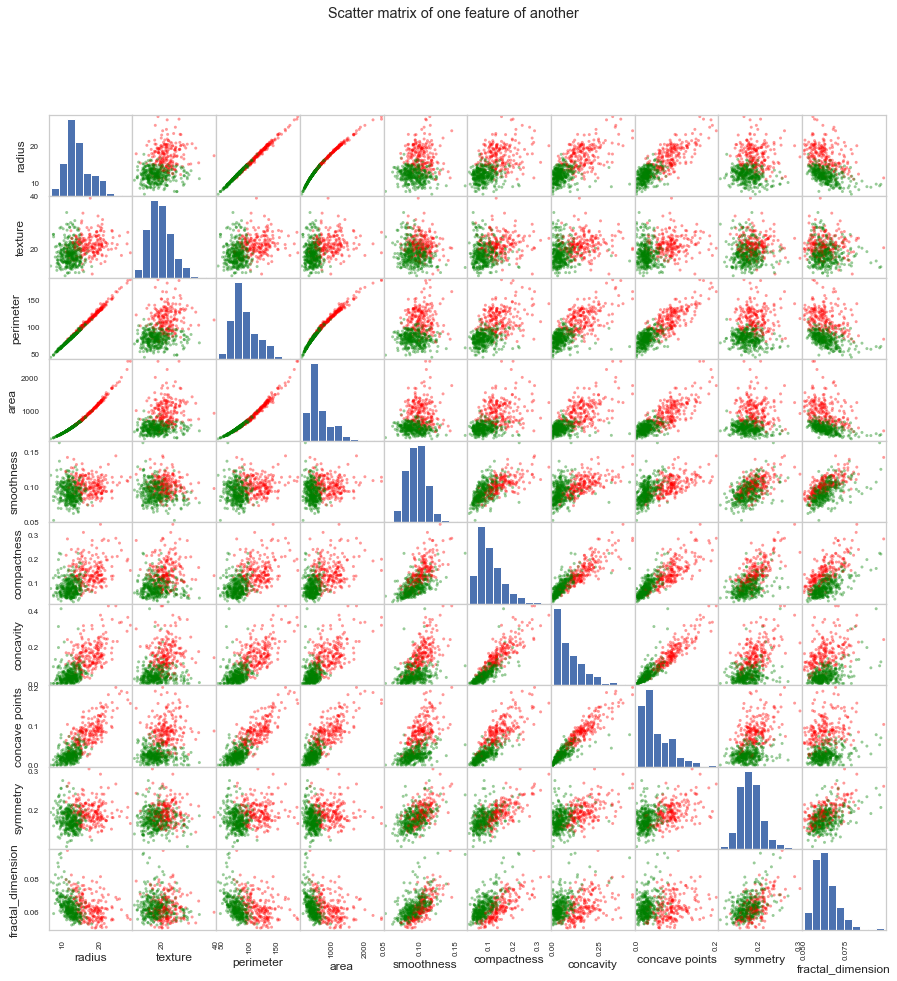

In [44]:
colors_dict = {'M':'red', 'B':'green'}
colors = final_df['diagnosis'].map(lambda x: colors_dict.get(x))
sm = scatter_matrix(features_df, c=colors, alpha=0.4, figsize=((15,15)));

plt.suptitle("Scatter matrix of one feature of another")
plt.show();

The malignant and benign groups are showing clear difference in all combinations of two features, which can give us a strong signal that we can use the features to predict the diagnosis well.


### Question 2: How well can we predict the malignancy using the LogisticRegression and the RandomForest algorithms?

In [30]:
[col[:-5] for col in features_df.columns]

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal_dimension']

In [122]:
# Get class
Y = cancer_df['diagnosis']

# Get the features
feature_list = list([col[:-5] for col in features_df.columns])
features_df.columns = feature_list
X = features_df

In [123]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print('train_X Shape:', train_X.shape)
print('train_Y Shape:', train_Y.shape)
print('test_X Shape:', test_X.shape)
print('test_Y Shape:', test_Y.shape)

train_X Shape: (398, 10)
train_Y Shape: (398,)
test_X Shape: (171, 10)
test_Y Shape: (171,)


In [124]:
#baseline
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, Y)
dummy_clf.score(X, Y)

0.5659050966608085

In [125]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train RandomForest model
model_rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf=3)
model_rf.fit(train_X, train_Y)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200)

In [126]:
from sklearn.linear_model import LogisticRegression

#Train LogisricRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(train_X, train_Y)

/Users/ziyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [127]:
def evaluate_models(X, Y, test_X, test_Y, models):

    """ 
    Description: This function can be used to evaluate a list of classifier models
    Arguments:
    X: features
    Y: classification
    test_X: test set of features
    test_Y: test set of classification
    models: list of models
    Return: 
    a list of accuracy and a list of csv score of 
    """
    accuracy = []
    cvs = []
    for i, model in enumerate(models):
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
        n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        pred_Y = model.predict(test_X)
        accuracy.append(accuracy_score(pred_Y, test_Y))
        cvs.append(np.mean(n_scores))
        print(f"Model {i + 1}:")
        print(f"Accuracy: {accuracy_score(pred_Y, test_Y):.2f}")
        print(f"Cross validation score: {np.mean(n_scores):.2%} (+/- {np.std(n_scores)*2:.2%})")
    return accuracy, cvs

In [128]:
accuracy, cvs = evaluate_models(X, Y, test_X, test_Y, [model_rf, model_lr])

Model 1:
Accuracy: 0.95
Cross validation score: 93.08% (+/- 6.05%)
Model 2:
Accuracy: 0.94
Cross validation score: 90.75% (+/- 5.38%)


In [129]:
d = {'accuracy':accuracy, 
     'cvs':cvs}
index = ['RandomForest', 'LogisticRegression']
df = pd.DataFrame(d, index=index)
df

,accuracy,cvs
RandomForest,0.947368,0.930765
LogisticRegression,0.935673,0.907545


As expected, we are able to use a simple ML algorithm to build a well-performed model to predict the diagnosis based on the features of the cell nucleus. Both RandomForest and LogisticRegression result in more than 0.9 accuracy, which is much higher than the baseline: 0.53. And RandomForest performs a bit better than the LogisticRegression.

### Question 3: What are features that can influence the class the most?

In [50]:
[round(importance,2) for importance in model_rf.feature_importances_]

[0.1, 0.06, 0.15, 0.12, 0.02, 0.04, 0.15, 0.34, 0.01, 0.01]

In [88]:
def get_feature_importances_from_trees(trees):
    importances = [round(importance,2) for importance in trees.feature_importances_]
    importances_df = pd.Series(importances, index=feature_list).sort_values(ascending=False)
    [print(f'Variable: {feature} Importance: {importance}') for feature, importance in importances_df.items()]
    fig, ax = plt.subplots()
    sns.barplot(x=feature_list, y=importances)
    ax.set_title("Feature importances")

Variable: concave points Importance: 0.34
Variable: concavity Importance: 0.15
Variable: perimeter Importance: 0.15
Variable: area Importance: 0.12
Variable: radius Importance: 0.1
Variable: texture Importance: 0.06
Variable: compactness Importance: 0.04
Variable: smoothness Importance: 0.02
Variable: fractal_dimension Importance: 0.01
Variable: symmetry Importance: 0.01


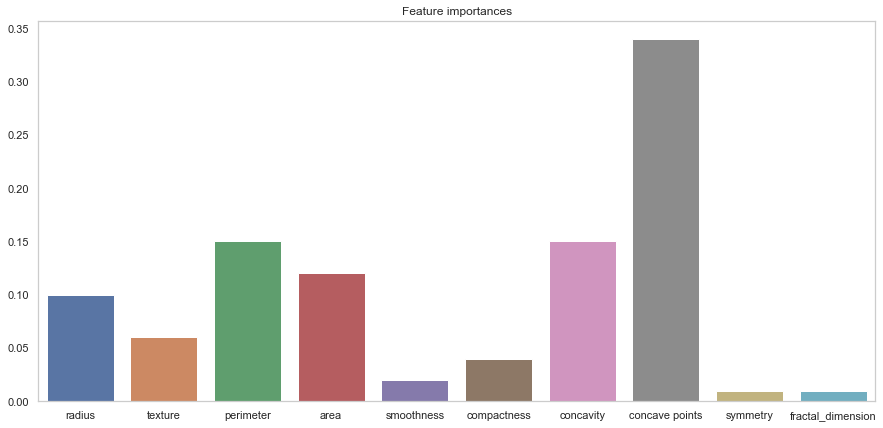

In [89]:
get_feature_importances_from_trees(model_rf)

From the figure above we can tell that the concave points (number of concave portions of the contour) is the most important feature, while smoothness, symmetry and fractal_dimension are almost indifferent between two diagnosis.